In [3]:
class Process:
    def __init__(self, name, priority, time_slice, power_consumption):
        self.name = name
        self.priority = priority
        self.time_slice = time_slice
        self.power_consumption = power_consumption
        self.remaining_time = time_slice
        self.start_time = 0
        self.power_used = 0
        
    def __str__(self):
        return f'{self.name} (priority: {self.priority}, time slice: {self.time_slice}, power consumption: {self.power_consumption})'
        
class CFS:
    def __init__(self, processes):
        self.processes = processes
        self.total_power_used = 0
        
    def run(self):
        current_time = 0
        
        while self.processes:
            # Sort the processes by priority and time slice
            self.processes.sort(key=lambda p: (p.priority, p.remaining_time))
            
            # Get the highest priority process
            current_process = self.processes[0]
            
            # Calculate the power used by the current process
            if current_process == self.processes[0]:
                power_used = current_process.power_consumption + 1
            else:
                power_used = current_process.power_consumption + 0.5
            
            # Update power used by the system
            self.total_power_used += power_used
            
            # Update the start time of the current process
            if current_process.remaining_time == current_process.time_slice:
                current_process.start_time = current_time
                
            # Execute the current process for one time slice
            current_process.remaining_time -= 1
            
            # Remove the process if it's finished
            if current_process.remaining_time == 0:
                print(f'{current_process.name} finished at time {current_time}')
                self.processes.remove(current_process)
                
            # Update the current time
            current_time += 1
        
        print(f'Total power used by the system: {self.total_power_used}W')

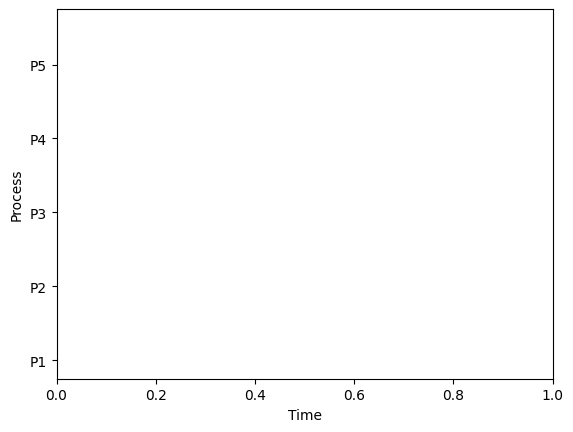

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Process:
    def __init__(self, pid, arrival_time, burst_time):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.start_time = 0

def spn(processes):
    # Initialize the waiting time and turnaround time for each process to 0
    waiting_time = [0] * len(processes)
    turnaround_time = [0] * len(processes)

    # Sort the processes by arrival time
    processes.sort(key=lambda x: x.arrival_time)

    # Set the current time to the arrival time of the first process
    current_time = processes[0].arrival_time

    # Keep track of the remaining burst time for each process
    remaining_time = [p.burst_time for p in processes]

    # Keep track of the processes that have completed execution
    completed = 0

    # Create a list of process IDs and start times for the Gantt chart
    gantt = [[p.pid, p.start_time, p.start_time + p.burst_time] for p in processes]

    while completed != len(processes):
        # Find the index of the process with the shortest remaining burst time
        min_time = float('inf')
        min_index = -1
        for i in range(len(processes)):
            if processes[i].arrival_time <= current_time and remaining_time[i] < min_time and remaining_time[i] > 0:
                min_time = remaining_time[i]
                min_index = i

        # If no eligible process is found, move the current time to the arrival time of the next process
        if min_index == -1:
            current_time = processes[completed+1].arrival_time
        else:
            # Update the waiting time, remaining time, and current time for the selected process
            waiting_time[min_index] = current_time - processes[min_index].arrival_time
            processes[min_index].start_time = current_time
            remaining_time[min_index] -= 1
            current_time += 1

            # Add the current time and remaining time for the selected process to the Gantt chart
            gantt[min_index].append(current_time)
            gantt[min_index].append(remaining_time[min_index])

            # If the selected process has completed execution, update the turnaround time and mark it as completed
            if remaining_time[min_index] == 0:
                turnaround_time[min_index] = current_time - processes[min_index].arrival_time
                completed += 1

    # Calculate the average waiting time and turnaround time
    avg_waiting_time = sum(waiting_time) / len(processes)
    avg_turnaround_time = sum(turnaround_time) / len(processes)

    # Draw the Gantt chart
    fig, ax = plt.subplots()

    yticks = []
    yticklabels = []
    for i, p in enumerate(processes):
        ax.add_patch(Rectangle((p.start_time, i), p.burst_time, 0.5, color='C0'))
        yticks.append(i + 0.25)
        yticklabels.append(f'P{p.pid}')

    ax.set_xlabel('Time')
    ax.set_ylabel('Process')
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_ylim([0, len(processes)])
   
if __name__ == '__main__':
    # Create processes
    processes = [
        Process(1, 0, 10),
        Process(2, 2, 5),
        Process(3, 3, 8),
        Process(4, 5, 3),
        Process(5, 6, 6)
    ]

    # Run SPN scheduling algorithm
    spn(processes)
